## Методы оптимизации
## Лабораторная работа #2

### Минимизация функции методами первого порядка
### Выполнили: Смирнов Николай (M33031), Козар Илья (M33051), Коняхин Всеволод  (M33051)

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Сравнение метода Брента и метода Брента с производной, одномерные функции

In [2]:
from methods_1d import minimize_1d, plot_log_e_to_num_iters

In [3]:
# Объявим одномерные функции и их производные

def f1(x):
    return -5 * x ** 5 + 4 * x ** 4 - 12 * x ** 3 + 11 * x ** 2 - 2 * x + 1  # [-0.5;0.5]


def df1(x):
    return -25 * x ** 4 + 16 * x ** 3 - 36 * x ** 2 + 22 * x - 2


# def f2(x):
#     return -3 * x * np.sin(0.75 * x) + np.exp(-2 * x) # [0;2pi]


def f2(x):
    return np.log10(x - 2) ** 2 + np.log10(10 - x) ** 2 - x ** 0.2  # [6;9.9]


# def df2(x):
#     return  -3 * np.sin(0.75 * x) - 2.25 * x * np.cos(0.75 * x) -2 * np.exp(-2 * x)


def df2(x):
    ft = - 0.2 / np.power(x, 0.8)
    st = 2 * np.log(x - 2) / ((x - 2) * np.log(10) ** 2)
    tt = - 2 * np.log(10 - x) / ((10 - x) * np.log(10) ** 2)
    return ft + st + tt


def f3(x):
    return np.exp(3 * x) + 5 * math.exp(-2 * x)  # [0;1]


def df3(x):
    return 3 * np.exp(3 * x) - 10 * np.exp(-2 * x)

In [4]:
np.log10(100)

2.0

In [5]:
# define functions
functions = [
    dict(fn=f1, dfn=df1, a=-0.5, b=0.5, title="$f_1 = -5 x^5 + 4 x^4 - 12 x^3 + 11 x^2 - 2x + 1 $"),
#     dict(fn=f2, dfn=df2, a=0, b=2 * math.pi, title="$f_2 = -3x \sin{(0.75 x)} + \exp{-2x}$"),
    dict(fn=f2, dfn=df2, a=6, b=9.9, title="$f_2 = \lg^2{(x-2)} + \lg^2{(10-x)} - x^{0.2}$"),
    dict(fn=f3, dfn=df3, a=0, b=1, title="$f_3 = \exp{3x} + 5 \exp{-2x}$"),
]

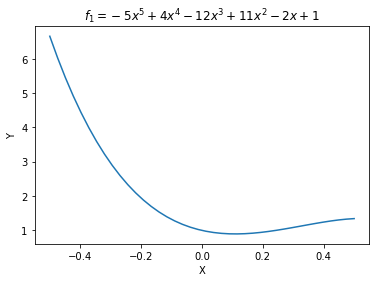

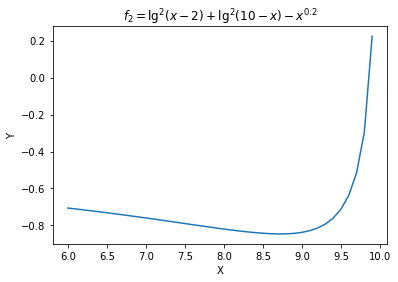

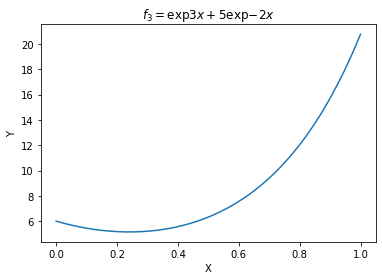

In [6]:
# Визуализируем фцнкции
for d in functions:
    x = np.linspace(d["a"], d["b"], 40)
    y = list(map(d["fn"], x))
    
    plt.plot(x, y)
    plt.title(d["title"])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

### Метод Брента без производной

Брент без производной:


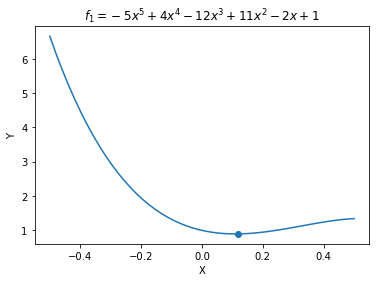

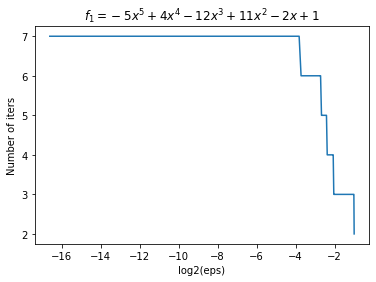

Брент с производной:


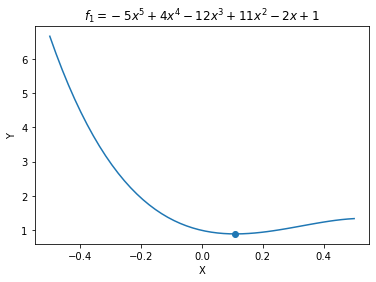

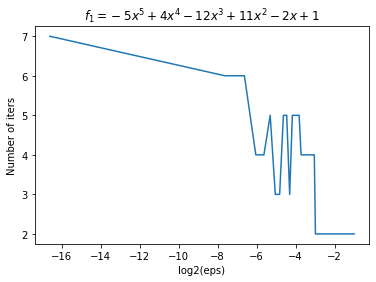

Брент без производной:


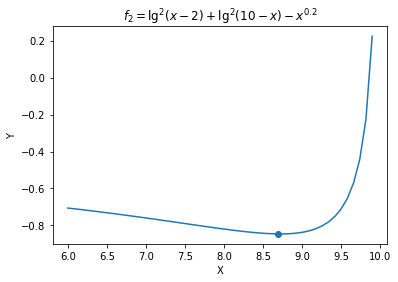

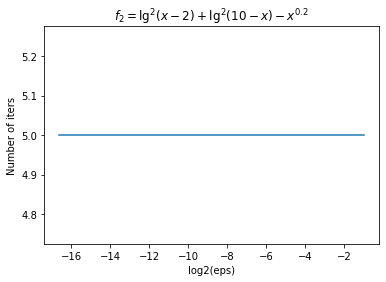

Брент с производной:


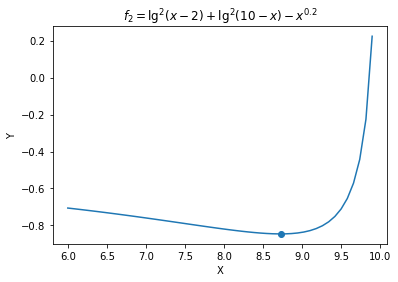

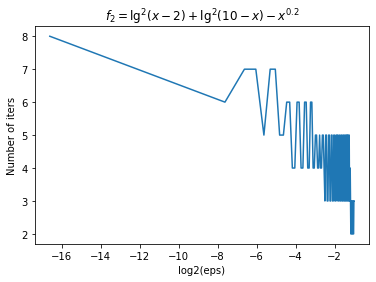

Брент без производной:


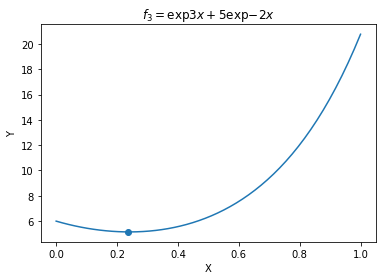

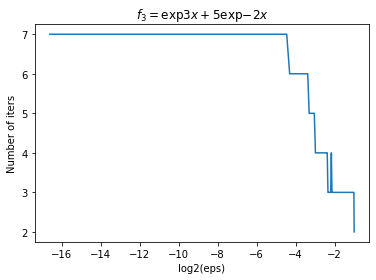

Брент с производной:


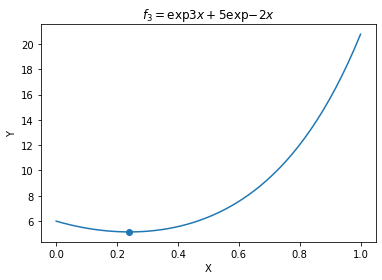

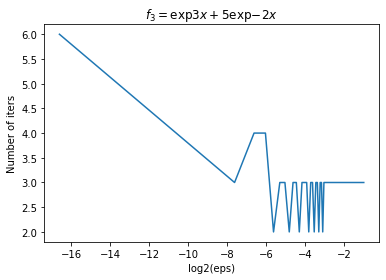

In [7]:
for fn in functions:
    print("Брент без производной:")
    _, x_min, y_min = minimize_1d(fn["fn"], "brent", fn["a"], fn["b"], 0.0001, fn["title"])
    plot_log_e_to_num_iters(fn["fn"], "brent", fn["a"], fn["b"], fn["title"])
    
    print("Брент с производной:")
    _, x_min, y_min = minimize_1d((fn["fn"], fn["dfn"]), "brent_derivative", fn["a"], fn["b"], 0.0001, fn["title"])
    plot_log_e_to_num_iters((fn["fn"], fn["dfn"]), "brent_derivative", fn["a"], fn["b"], fn["title"])

### Вывод по методу Брента:
По графику количества итераций от логарифма точности видно, что метод Брента с производной сходится в среднем за меньшее число итераций по сравнению с методом без производной, примерно в 2 раза. Однако в случае с производной алгоритм делает два обращения к ораклу против одного, из чего можно сделать вывод, что алгоритмы примерно одинаковы с точки зрения эффективности, выбирать версию (с или без производной) нужно исходя из того, насколько "дорого" обращение к оракулу функции. Главным недостатком данного метода, безусловно, является невозможность его использования для минимизации многомерных функций.

## Многомерные функции

In [8]:
from methods_Nd import minimize_Nd, plot_log_e_to_num_iters
from plot_utils import graph_full

In [9]:
def f1(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def df1(x):
    df1_dx1 = 2 * (200 * x[0] ** 3 - 200 * x[0] * x[1] + x[0] - 1)
    df1_dx2 = 200 * (x[1] - x[0] ** 2)

    return np.array([df1_dx1, df1_dx2])

def f2(x):
    return (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def df2(x):
    df2_dx1 = 2 * (2 * x[0] ** 3 - 2 * x[0] * x[1] + x[0] - 1)
    df2_dx2 = 2 * (x[1] - x[0] ** 2)
    return np.array([df2_dx1, df2_dx2])

def f3(x):
    return (1.5 - x[0] * (1 - x[1])) ** 2 + (2.25 - x[0] * (1 - x[1] ** 2)) ** 2 + (2.625 - x[0] * (1 - x[1] ** 3)) ** 2

def df3(x):
    df3_dx1 = 2 * x[0] * (x[1] ** 6 + x[1] ** 4 - 2 * x[1] ** 3 - x[1] ** 2 - 2 * x[1] + 3) + 5.25 * x[1] ** 3 + 4.5 * x[1] ** 2 + 3 * x[1] - 12.75
    df3_dx2 = x[0] * (x[0] * (6 * x[1] ** 5 + 4 * x[1] ** 3 - 6 * x[1] ** 2 - 2 * x[1] - 2) + 15.75 * x[1] ** 2 + 9 * x[1] + 3)

    return np.array([df3_dx1, df3_dx2])

def f4(x):
    return (x[0] + x[1]) ** 2 + 5 * (x[2] - x[3]) ** 2 + (x[1] - 2 * x[2]) ** 4 + 10 * (x[0] - x[3]) ** 4

def df4(x):
    df4_dx1 = 2 * (20 * (x[0] - x[3]) ** 3 + x[0] + x[1])
    df4_dx2 = 2 * (x[0] + 2 * (x[1] - 2 * x[2]) ** 3 + x[1])
    df4_dx3 = 10 * (x[2] - x[3]) - 8 * (x[1] - 2 * x[2]) ** 3
    df4_dx4 = 10 * (-4 * (x[0] - x[3]) ** 3 + x[3] - x[2])

    return np.array([df4_dx1, df4_dx2, df4_dx3, df4_dx4])

In [31]:
# define functions
functions = [
    {
        'name': 'f1',
        'title': '$f_1 = 100 (x_2 - {x_1}^2)^2 + (1 - x_1)^2$',
        'func': f1,
        'deriv': df1,
        'dims': 2,
        'initPoint': np.zeros(2),
        'initPointsForRavine': (np.array([0.5, 0.5]), np.array([0.45, 0.4])),
        'bounds': (1, 1),
    },
    {
        'name': 'f2',
        'title': '$f_2 = (x_2 - {x_1}^2)^2 + (1 - x_1)^2$',
        'func': f2,
        'deriv': df2,
        'dims': 2,
        'initPoint': np.zeros(2),
        'initPointsForRavine': (np.array([0.5, 0.5]), np.array([0.45, 0.4])),
        'bounds': (1, 1),
    },
    {
        'name': 'f3',
        'title': '$f_3 = (1.5 - x_1 (1 - x_2))^2 + (2.25 - x_1 (1 - {x_2}^2))^2 + (2.625 - x_1 (1 - {x_2}^3))^2$',        
        'func': f3,
        'deriv': df3,
        'dims': 2,
        'initPoint': np.zeros(2),
        'initPointsForRavine': (np.array([0.5, 0.5]), np.array([0.45, 0.4])),        
        'bounds': (1, 1),
    }, 
    {
        'name': 'f4',
        'title': '$f_4 = (x_1 + x_2)^2 + 5 (x_3 - x_4)^2 + (x_2 - 2 x_3)^4 + 10 (x_1 - x_4)^4 $',
        'func': f4,
        'deriv': df4,
        'dims': 4,
        'initPoint': np.ones(4),
        'initPointsForRavine': (np.array([0.5, 0.5, 0.5, 0.5]), np.array([0.45, 0.4, 0.5, 0.5])),
        'bounds': (1, 1),
    }, 
]

### Метод наискорейшего градиентного спуска

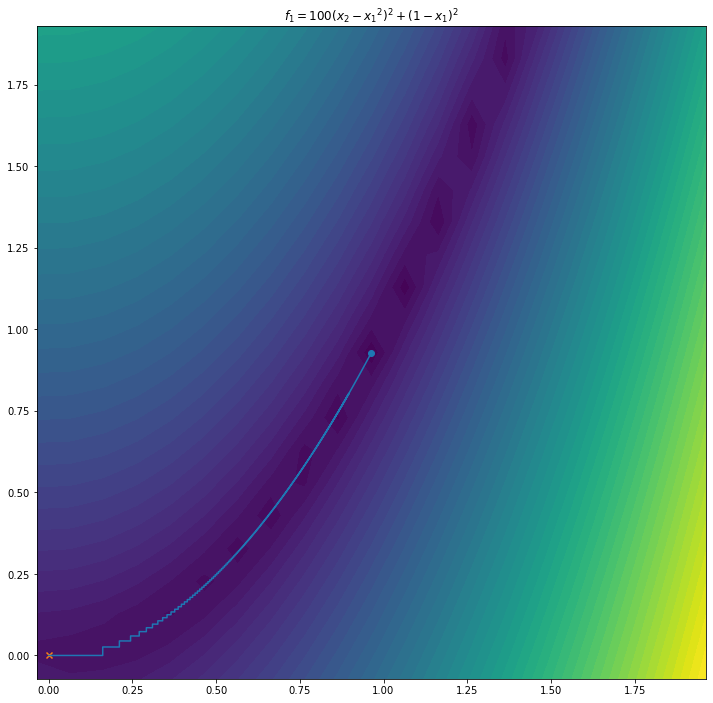

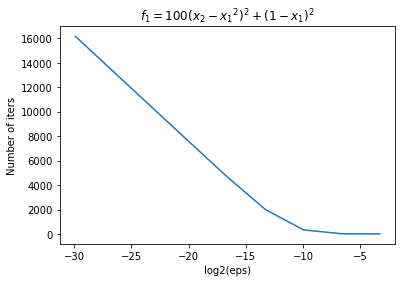

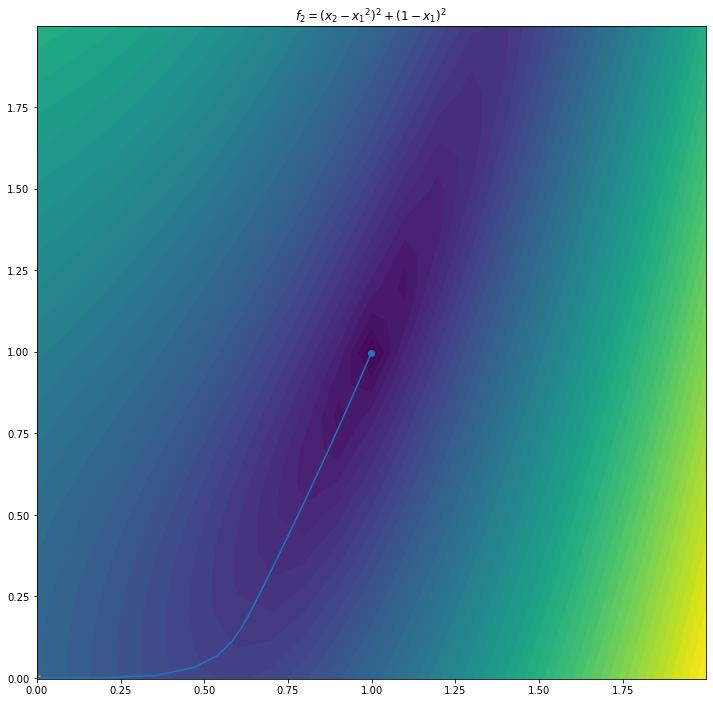

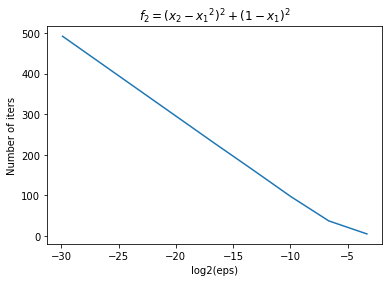

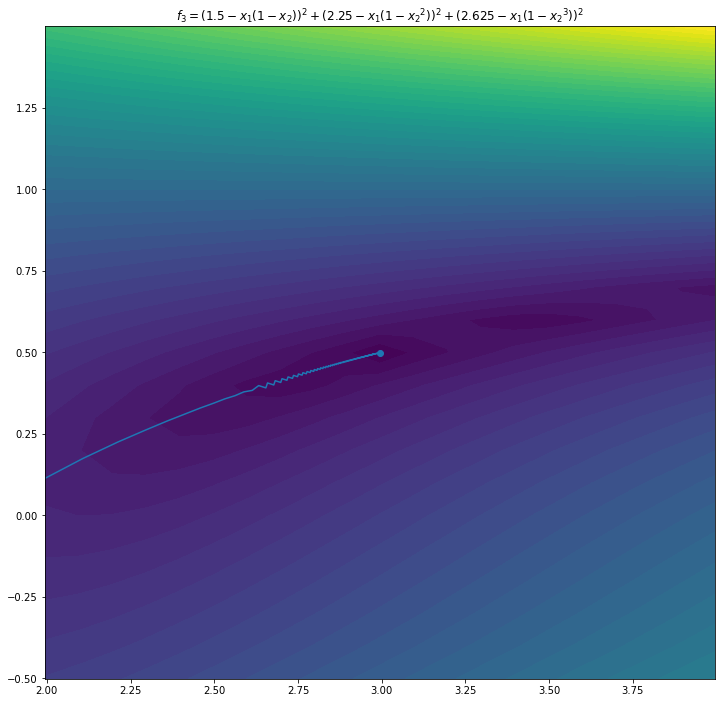

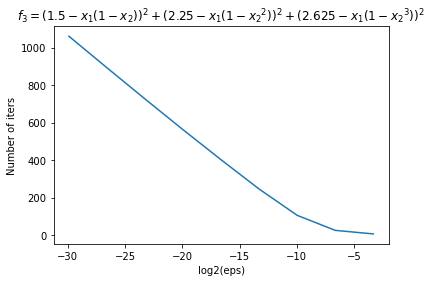

In [11]:
for fn in functions[:-1]:
    minimize_Nd(fn, 'steepest-descent')
    plot_log_e_to_num_iters(fn, 'steepest-descent')

### Метод покоординатного градиентного спуска

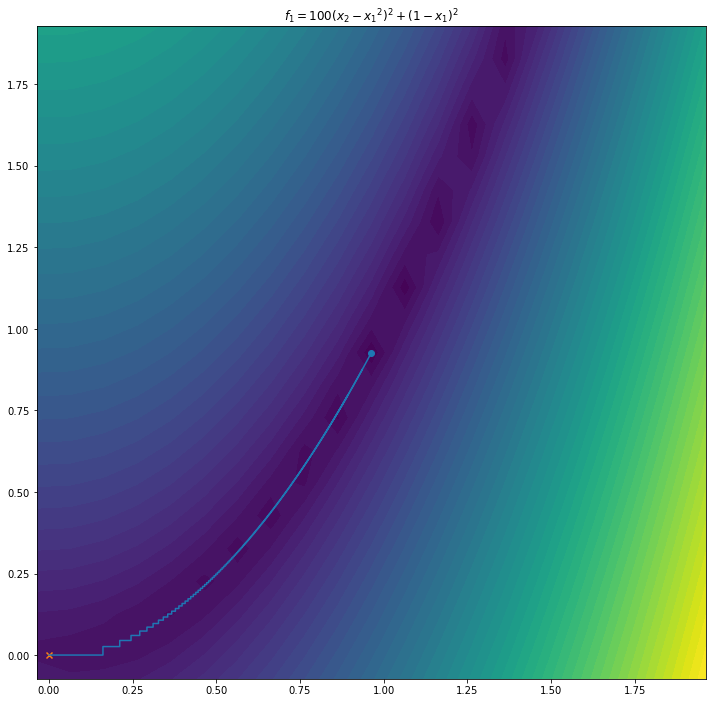

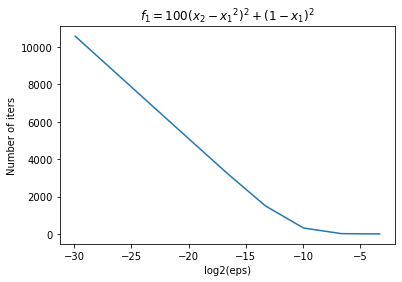

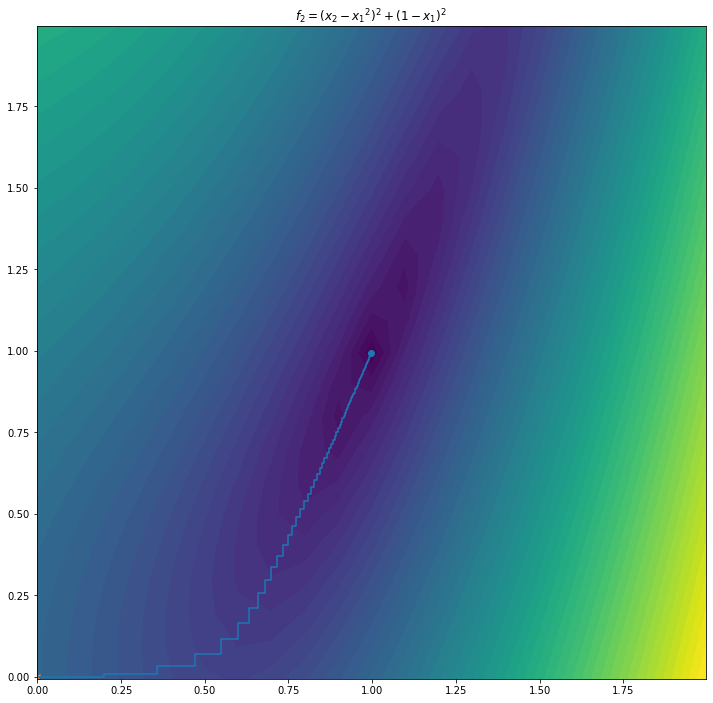

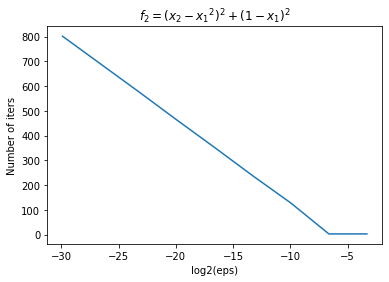

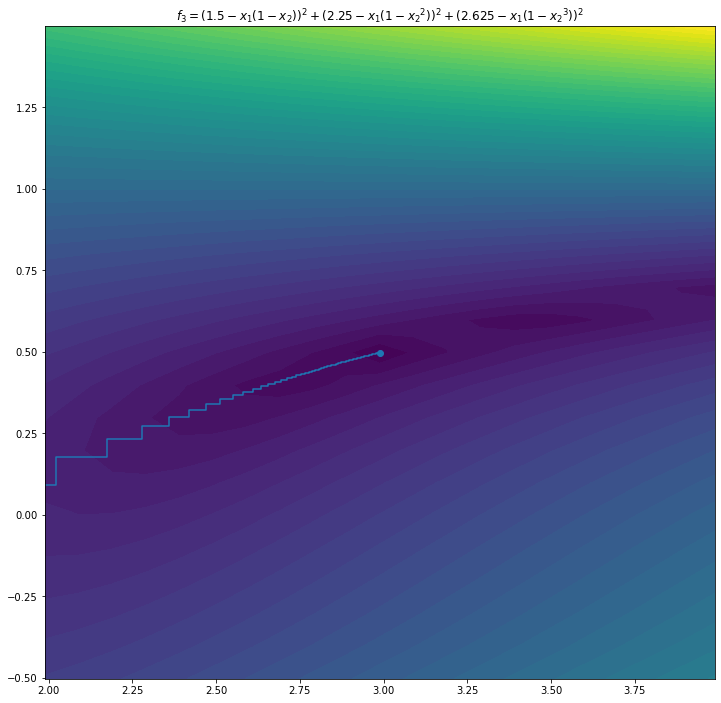

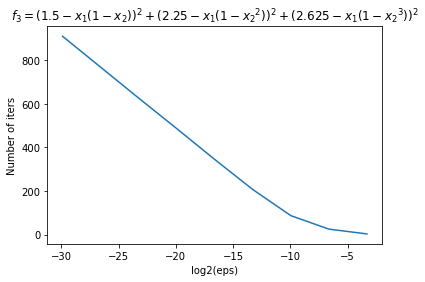

In [12]:
for fn in functions[:-1]:
    minimize_Nd(fn, 'coordinate-descent')
    plot_log_e_to_num_iters(fn, 'coordinate-descent')

### Метод проекционного градиента

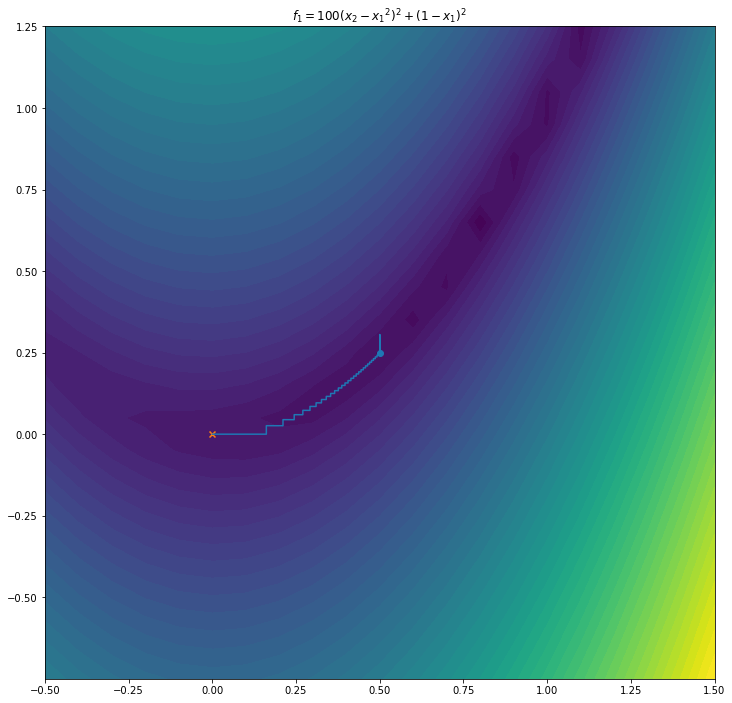

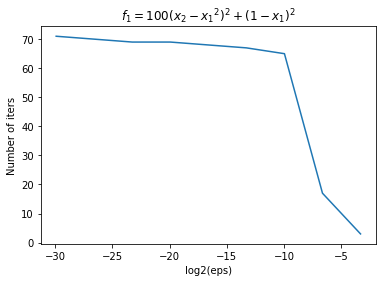

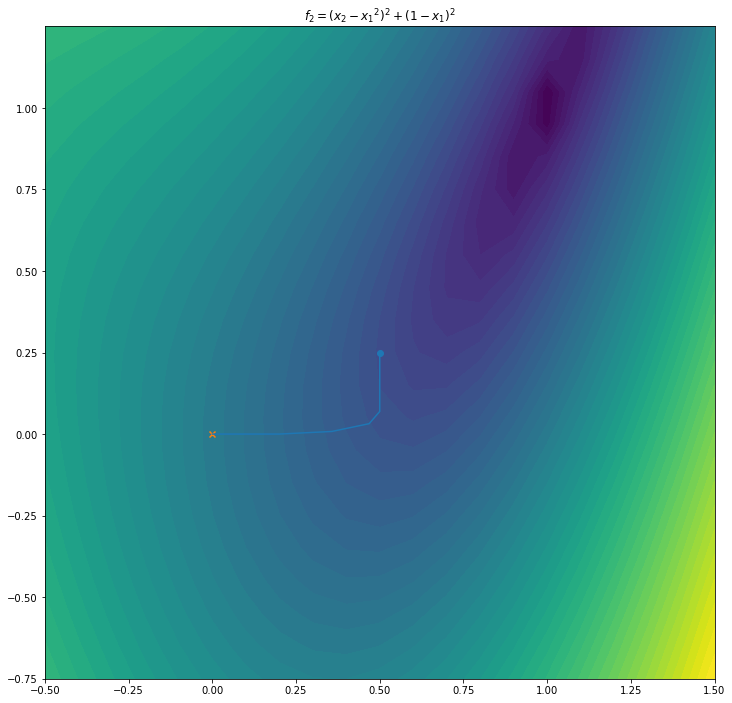

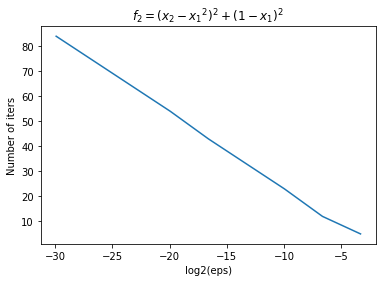

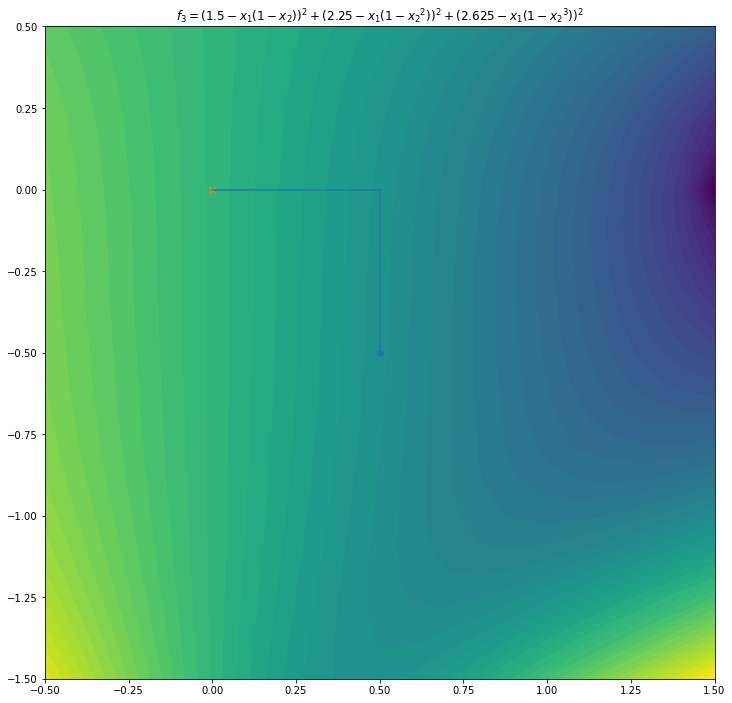

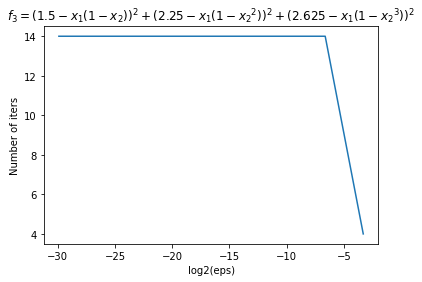

In [13]:
# Проекция в ограниченную область
for fn in functions[:-1]:
    minimize_Nd((fn, lambda x: np.clip(x, -0.5, 0.5)), 'projected-descent')
    plot_log_e_to_num_iters((fn, lambda x: np.clip(x, -0.5, 0.5)), 'projected-descent')

In [14]:
# Проекция в случайное подмножество исходного множества

def take_random_subset(size, st=0.5, end=3, h=0.002):
    xx, yy = np.meshgrid(np.arange(st, end, h), np.arange(st, end, h))
    samples = np.c_[xx.ravel(), yy.ravel()]
    rand_indices = np.random.choice(len(xx), size)
    subset = samples[rand_indices, :]
    return subset

def minimize_euclid_distance(x, y_set):
    min_dist = np.linalg.norm(x - y_set[0]) ** 2
    projected_vector = y_set[0]
    
    for y in y_set[1:]:
        d = np.linalg.norm(x - y) ** 2
        if d < min_dist:
            min_dist = d
            projected_vector = y
            
    return projected_vector

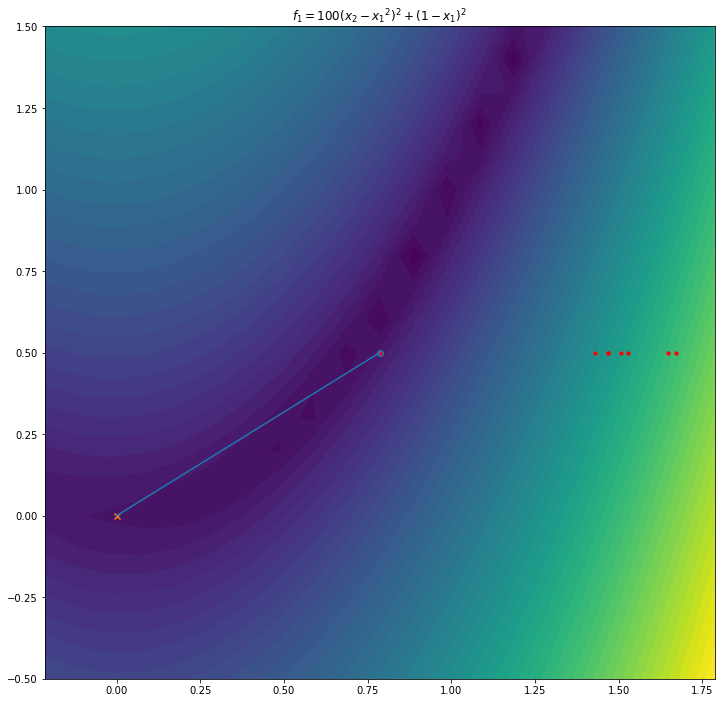

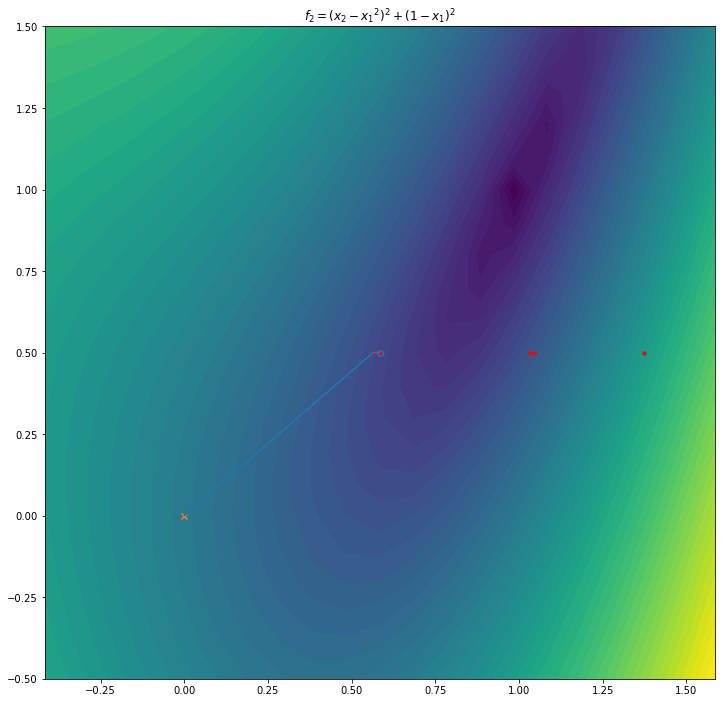

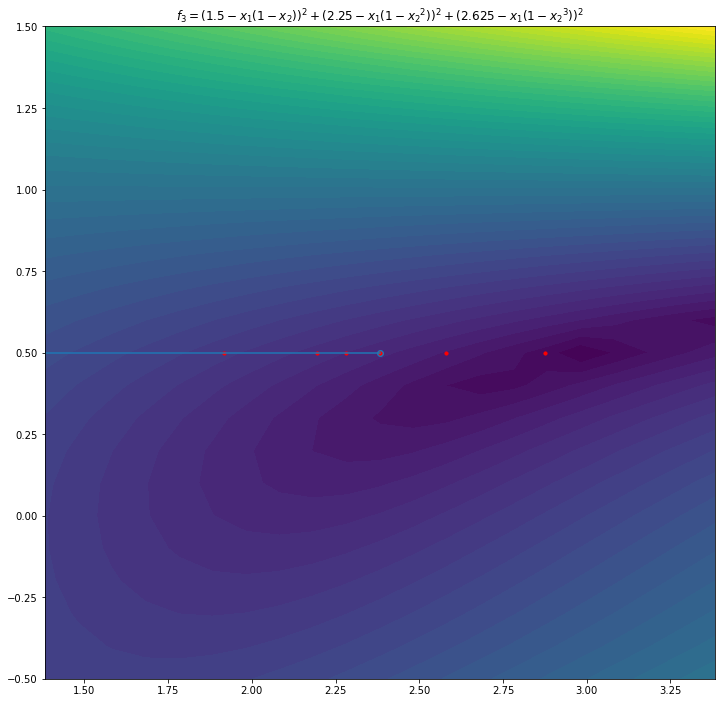

In [15]:
for fn in functions[:-1]:
    subsample = take_random_subset(10)
    p = minimize_Nd((fn, lambda x: minimize_euclid_distance(x, subsample)), 'projected-descent', visualize=False)
    
    graph_full(fn, p[-1], fn['bounds'], path=p, show=False)
    plt.scatter(subsample[:, 0], subsample[:, 1], color='red', s=10)
    
    plt.show()

### Метод овражного градиента

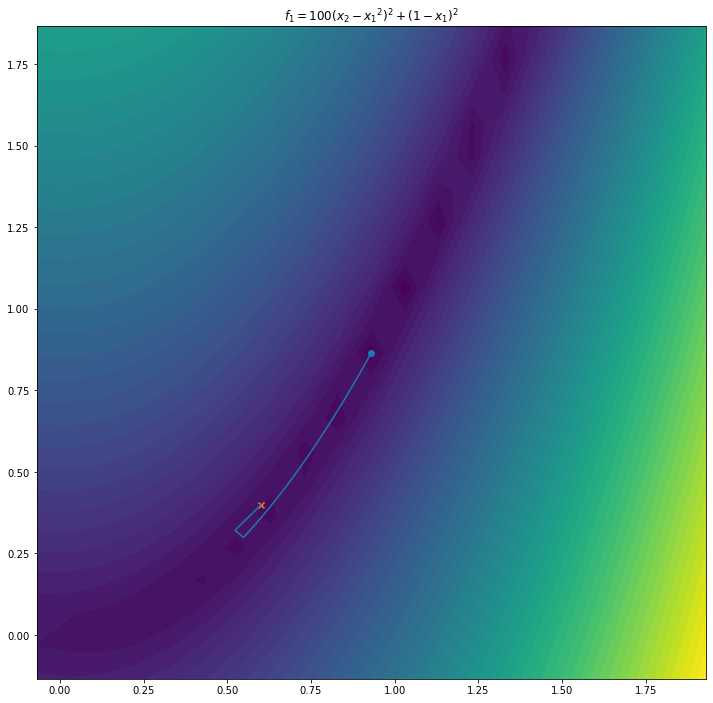

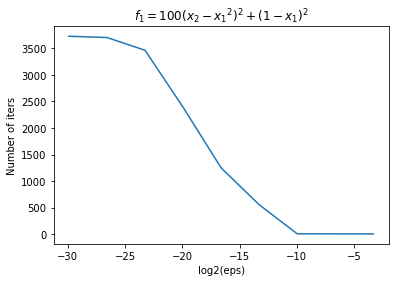

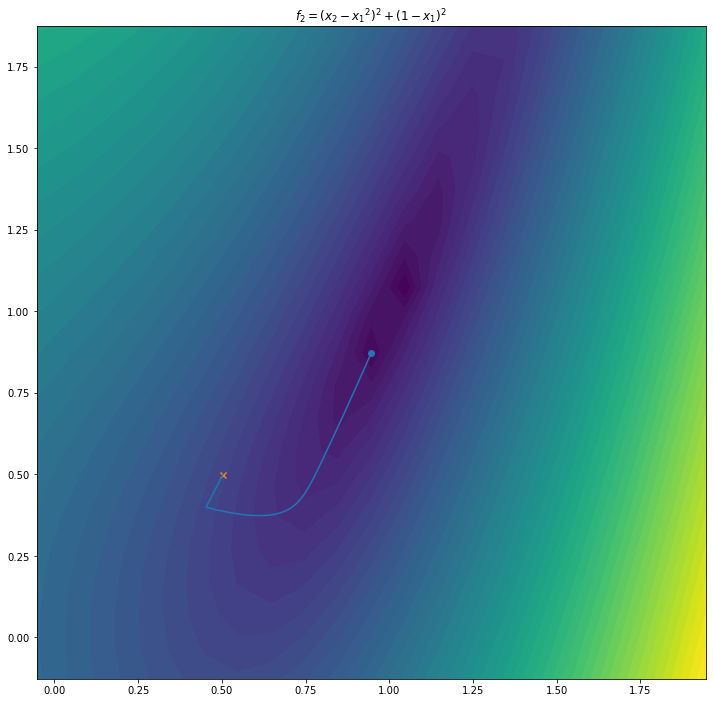

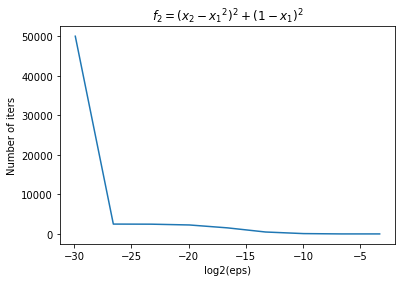

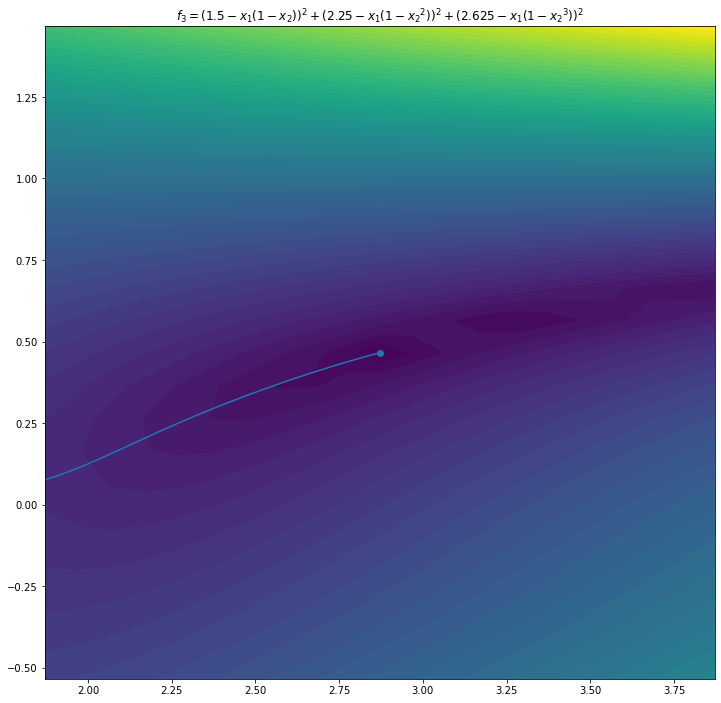

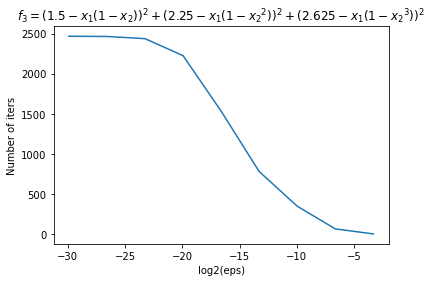

In [16]:
for fn in functions[:-1]:
    minimize_Nd(fn, 'ravine-descent')
    plot_log_e_to_num_iters(fn, 'ravine-descent')

### Четырехмерный случай

In [32]:
p1 = minimize_Nd(functions[-1], 'steepest-descent', visualize=False)
p2 = minimize_Nd(functions[-1], 'coordinate-descent', visualize=False)
p3 = minimize_Nd(functions[-1], 'ravine-descent', visualize=False)

In [33]:
functions[-1]['func'](p1[-1])

5.287703168820145e-06

In [35]:
functions[-1]['func'](p2[-1])

0.004203602589868587

In [34]:
functions[-1]['func'](p3[-1])

0.0017357006512057375

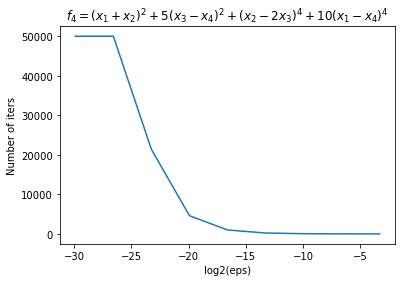

In [37]:
plot_log_e_to_num_iters(functions[-1], 'steepest-descent')

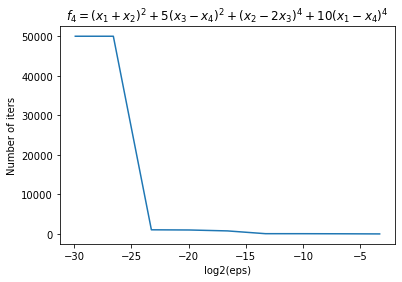

In [38]:
plot_log_e_to_num_iters(functions[-1], 'coordinate-descent')

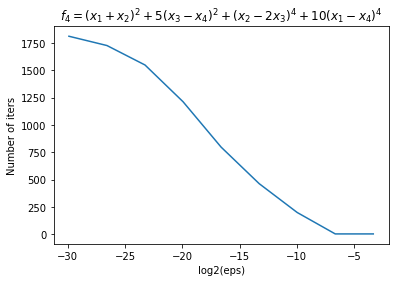

In [23]:
plot_log_e_to_num_iters(functions[-1], 'ravine-descent')

### Выводы
По графику релаксационного последовательности отчетливо (в случае, когла длина шага достаточно большая) видно, что отрезки параллельны осям координат. 

Координатный и наискорейший методы оптимизации сходятся примерно с одинаковой скоростью, поскольку и там, и там решается задача одномерной оптимизации для величины шага. При этом координатный метод на каждой итерации вычисляет производную лишь по одной размерности, что уменьшает расход ресурсов.

Проекционный метод работает за такое же число итераций, что и наискорейший градиентный метод. Однако при вычислении проекции тоже решается задача оптимизации (нахождение наиближайщего вектора из подмножества к полученному новому вектору), при этом ее решение может быть сильно затратным, в зависимости от пространства проекции. 

Овражный метод сходится быстрее всех, поскольку рассматриваемые функции и есть в форме "оврага". Овражный метод, благодаря вспомогательным векторам V, не проваливается быстро в минимум, что не дает ему дальше прыгать вокруг экстремума, а быстро сходится точно в экстремум.